In [453]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("avocado.csv")

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

# Preprocessing:

We'll check for null values first and then if any feature does have them, we can impute them with vaious imputation techniques.

In [ ]:
df.isnull().sum()

As we can see that there are no null values so no imputation is required. We can also drop the index column as it would be useless for model making.

In [ ]:
df.drop(columns=df.columns[0],inplace=True,axis=1)

In [ ]:
df

to check the data type of each column to figure out the numerical and categorical features we can use dtypes method or simply use df.info()

In [ ]:
df.info()

Date should always be kept as a datetime object to be made useful for the model to extract information.Let's do some feature engineering and convert date to a pandas datetime object and create month feature so we can do an informational EDA 

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month.astype('float')

In [ ]:
df['Day']=df['Date'].dt.day.astype('float')

In [ ]:
df.head()

# EDA:

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Day'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

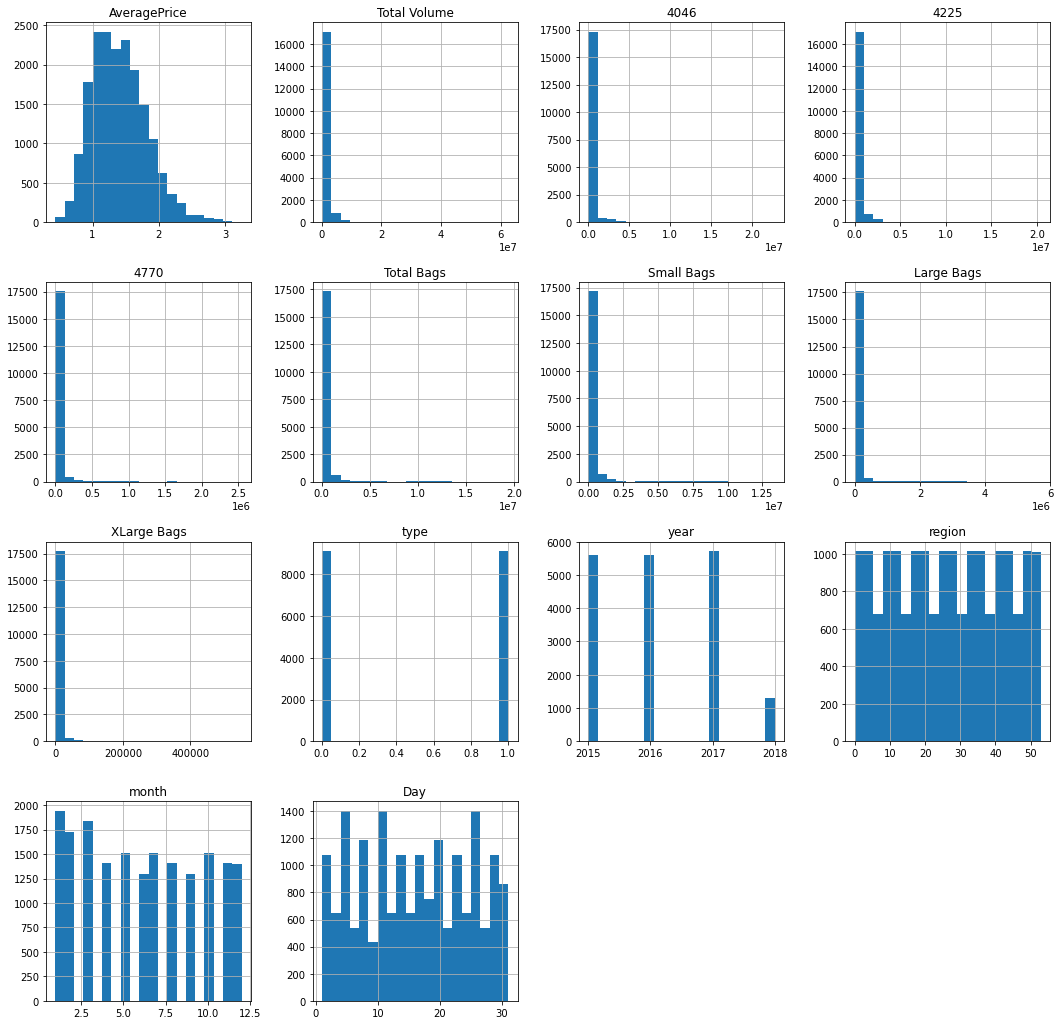

In [495]:
df.hist(figsize=(18,18),layout = (4,4),bins=20)

Observations: 
1. we have only 4 unique values for year with 2018 having least data points.
2. Average Price is a normal distributed curve with some skewness.
3. most of the columns are skewed and also not in normal distribution, hence paving the way for a log or sqrt transformation to create normally distributed features

In [ ]:
sns.barplot(x=df["month"],y=df["AveragePrice"])

In [ ]:
sns.barplot(x=df["year"],y=df["AveragePrice"])

In [ ]:
sns.catplot(x="AveragePrice",y="type",data=df)

We can infer from the above graph the price of organic avocado is more than the conventional one which maskes sense as organic is an expensive type of farming.

In [ ]:
plt.figure(figsize=(15,10))
Grp=df.groupby("Date").mean()   #we'll take the mean of the prices of orders made on same dates and group the df by the unique date 
Grp['AveragePrice'].plot(grid=True,fontsize=10,colormap="rocket",kind="line")
plt.title('Average Price')

We can see that the average price spikes up each year from the month july to october with prices being the highest in the month of october

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,x="AveragePrice" ,y = "month",hue="type")


As we can see from the above graph and also the one below, from the month 8 to 10 there are more instances or datapoints with higher average price than any other month. Also, the lowest price in October is the highest in the whole year. September has the highest averagePrice in each year from thr dataset

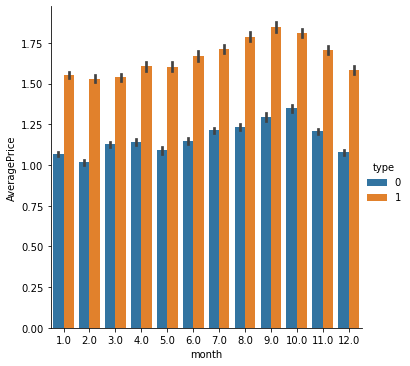

In [487]:
sns.catplot(x="month", y="AveragePrice",hue="type",data=df,kind="bar")

We can also see that conventional Avocados price peaks in the month of October whereas for organic Avocados, the peak lies in September.

<AxesSubplot:xlabel='Day', ylabel='AveragePrice'>

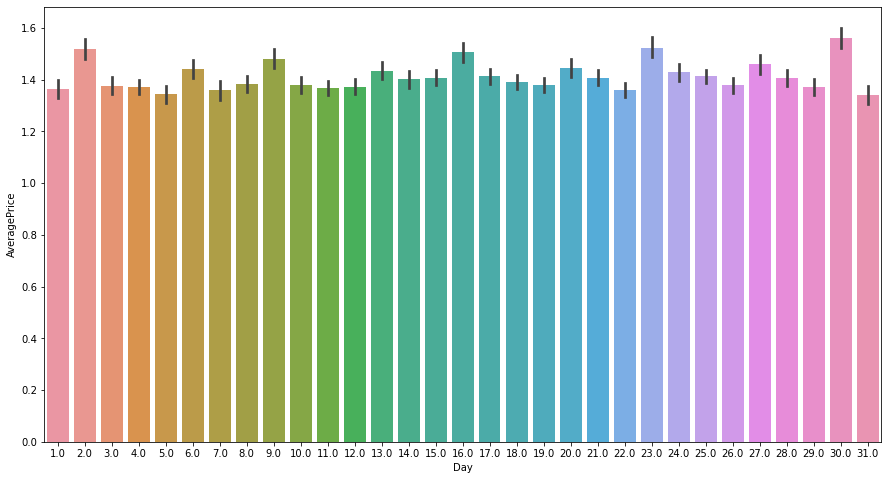

In [494]:
plt.figure(figsize=(15,8))
sns.barplot(x=df["Day"],y=df["AveragePrice"])

In [ ]:
plt.figure(figsize=(22,10))
sns.barplot(x=df["region"],y=df["Total Volume"])
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Total Volume consumption vs Region')
plt.legend()

We can see from the above graph that the total consumption is highest in the West, South Central and California

In [ ]:
plt.figure(figsize=(22,10))
sns.barplot(x=df["region"],y=df["AveragePrice"])
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price vs Region')


we can observe that HarttfordSpringfield and San Fransico are the cities where the avocado price is the highest. Houston and DallasForthworth are places where the price per avocado is the lowest.

# Encoding Categorical Columns:

We need to convert categorical variables to numeric one so as to use it for model making and correlation matrix, skewness and outlier checks

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df["region"]=le.fit_transform(df["region"])


In [ ]:
df["region"].unique()

In [ ]:
le = LabelEncoder()
df["type"]=le.fit_transform(df["type"])

In [ ]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True)

As we have already created 2 different columns( month and day) to capture much more information from the date, we can drop the actual date column which will hinder our process of creating a model.

In [ ]:
df.drop("Date",inplace=True,axis=1)

# Outliers:

In [ ]:
from scipy.stats import zscore

In [ ]:
z = np.abs(zscore(df))
z.shape

In [ ]:
#np.where returns the index where the data points are outliers
threshold = 3
print(np.where(z>3))

In [ ]:
df1_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df1_new.shape)

We have been successfully able to remove outliers using zscore which has reduced our dataset from 18,249 rows to 17651 rows.

# Skewness

We can now check the skewness of the columns and correct those which lies outside the standard limit of +/- 0.5

as we can see 8 columns have skewness which we can possibly reduce using log or sqrt transformation. 

In [ ]:
df1_new.skew()

In [ ]:
for i in df.columns[1:9]:
    df1_new[i]=np.log1p(df1_new[i])

In [ ]:
df1_new.skew()

The skewness have been greatly reduced and is very well within the standard range except for the XLarge Bags which we can check from the above heatmap is the least correlated to both the target variable: AveragePrice(Regression) and Region(Classification). Also we have used Log1p transformation instead of the normal log transformation, because Log1p or Log 1 plus is suitable for handling data and when data is closer to 0. It also avoids the skewness coeff to result in NaN(can be the case when you use log transformation).

We can now check the correlation once again and see if it has improved or not

In [ ]:
plt.figure(figsize=(17,10))
sns.heatmap(df1_new.corr(),annot=True)

As we can see there has been a huge improvement for both the target variable: AveragePrice(Regression) and Region(Classification). Correlation is now positive from negative earlier

We can now proceed to create models.

# Data Preprocessing for Model:

In [ ]:
df1_new.columns

In [ ]:
x=df1_new.iloc[:,1:]
y=df1_new.iloc[:,0]

In [ ]:
x.shape,y.shape

In Data Processing, we try to change the data in such a way that the model can process it without any problems. And Feature Scaling is one such process in which we transform the data into a better version. Feature Scaling is done to normalize the features in the dataset into a finite range.

There are several ways to do feature scaling. I will be discussing the top 5 of the most commonly used feature scaling techniques:
    Absolute Maximum Scaling,
    Min-Max Scaling,
    Normalization,
    Standardization


I'll be using the Standar scaler as its the most popular and yields good results in the models

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
df1_new.describe()

# Regression Models (predicting Average Price):

First we'll check the best random state:

In [ ]:
l=[]
for i in range(0,1000):
    # setting up testing and training sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr = LinearRegression().fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random State = ",i)
        print("Training r2 score: ",(r2_score(y_train,pred_train)*100))
        print("Testing r2 score: ",(r2_score(y_test,pred_test)*100))
        print("\n")
        l.append(i)

In [461]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=538)

In [462]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
pred_lr= lr.predict(xtest)

In [463]:
lrr2 = r2_score(ytest,pred_lr)

for k in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=k)
    lrcv=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lrcv*100)
    print("r2 score is : ",lrr2*100)
    print("\n")

At cv=  2
Cross Val score :  -105.49215178122779
r2 score is :  55.58844359490651


At cv=  3
Cross Val score :  17.698599377270387
r2 score is :  55.58844359490651


At cv=  4
Cross Val score :  12.372135758610609
r2 score is :  55.58844359490651


At cv=  5
Cross Val score :  19.9430660097306
r2 score is :  55.58844359490651


At cv=  6
Cross Val score :  10.95780776798787
r2 score is :  55.58844359490651


At cv=  7
Cross Val score :  13.336645245942972
r2 score is :  55.58844359490651


At cv=  8
Cross Val score :  12.92901226333329
r2 score is :  55.58844359490651


At cv=  9
Cross Val score :  14.031357890961472
r2 score is :  55.58844359490651




In [464]:
lsscore_selected = cross_val_score(lr,x,y,cv = 5).mean()
print("The cv score is: ", lsscore_selected, "\nThe r2 score is: ",lrr2)

The cv score is:  0.199430660097306 
The r2 score is:  0.5558844359490651


In [465]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(ytest, pred_lr))
print('MSE:', metrics.mean_squared_error(ytest, pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, pred_lr)))

MAE: 0.2037267483188035
MSE: 0.06601128582395645
RMSE: 0.2569266156394788


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

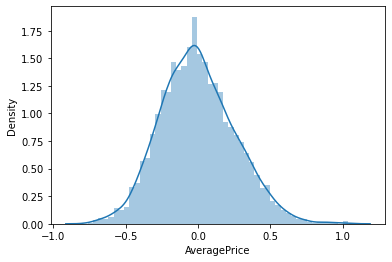

In [486]:
sns.distplot((ytest-pred_lr),bins=50)


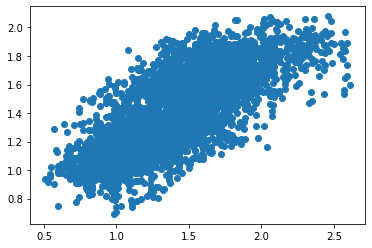

In [466]:
plt.scatter(x=ytest,y=pred_lr)

# Model 2 :

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=538)

In [468]:

dt_reg_params = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
grid_dt_reg = GridSearchCV(DecisionTreeRegressor(), dt_reg_params)
grid_dt_reg.fit(xtrain, ytrain)

dt_reg = grid_dt_reg.best_estimator_
print("Best Estimators for Decision Tree Regression: ", grid_dt_reg.best_params_)

print("------------------------------------------")

Best Estimators for Decision Tree Regression:  {'criterion': 'friedman_mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}
------------------------------------------


In [469]:
print("best r2 score: ",grid_dt_reg.best_score_)

best r2 score:  0.6745789607268552


In [470]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth= 8, max_leaf_nodes= 100, min_samples_leaf= 20, min_samples_split= 10)
dtr.fit(xtrain, ytrain)
pred_dtr= dtr.predict(xtest)

In [471]:
dtrr2 = r2_score(ytest,pred_dtr)

for k in range(2,10):
    dtrscore=cross_val_score(dtr,x,y,cv=k)
    dtrcv=dtrscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtrcv*100)
    print("r2 score is : ",dtrr2*100)
    print("\n")

At cv=  2
Cross Val score :  -178.02536296991627
r2 score is :  69.43319353724131


At cv=  3
Cross Val score :  -7.967505566983202
r2 score is :  69.43319353724131


At cv=  4
Cross Val score :  -7.640835842466939
r2 score is :  69.43319353724131


At cv=  5
Cross Val score :  3.770477739021268
r2 score is :  69.43319353724131


At cv=  6
Cross Val score :  -0.32238869540378945
r2 score is :  69.43319353724131


At cv=  7
Cross Val score :  2.462338004190095
r2 score is :  69.43319353724131


At cv=  8
Cross Val score :  7.17978108389347
r2 score is :  69.43319353724131


At cv=  9
Cross Val score :  8.985084584200004
r2 score is :  69.43319353724131




At cv = 9 , cross validation score is 8.98 and r2 score is 69.433

In [481]:
print('MAE:', metrics.mean_absolute_error(ytest, pred_dtr))
print('MSE:', metrics.mean_squared_error(ytest, pred_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, pred_dtr)))

MAE: 0.16197647102751314
MSE: 0.04543308907560173
RMSE: 0.21315039074700692


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

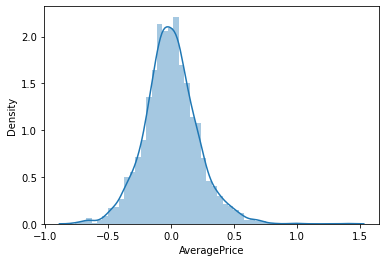

In [485]:
sns.distplot((ytest-pred_dtr),bins=50)


Lets's check if its giving a better line than Linear regression

Text(0, 0.5, 'Y Pred')

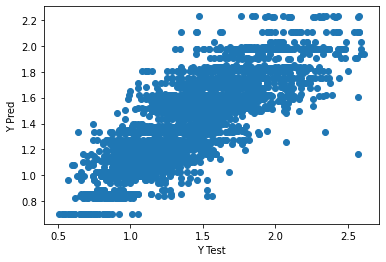

In [472]:
plt.scatter(x=ytest,y=pred_dtr)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')

# Model 3: Random Forest Regressor

In [451]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=45)

In [474]:

rf_reg_params =  { 'max_depth': [5,7,10], "criterion": ["squared_error", "absolute_error", "poisson"],
                  'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [50,100,150,200]}
rand_rf_reg = RandomizedSearchCV(RandomForestRegressor(), rf_reg_params)

rand_rf_reg.fit(X_train, y_train)

rf_reg = rand_rf_reg.best_estimator_
print(rf_reg)
print("Best Estimators for Decision Tree Regression: ", rand_rf_reg.best_params_)
print("best r2 score: ",rand_rf_reg.best_score_)
print("------------------------------------------")

RandomForestRegressor(criterion='poisson', max_depth=5, max_features='sqrt',
                      n_estimators=150)
Best Estimators for Decision Tree Regression:  {'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'poisson'}
best r2 score:  0.17601236597734699
------------------------------------------


In [475]:
rfr = RandomForestRegressor(criterion='poisson', max_depth= 10, max_features="sqrt",n_estimators=150)
rfr.fit(X_train, y_train)
pred_rfr= rfr.predict(X_test)

In [476]:
rfrr2 = r2_score(ytest,pred_dtr)

for k in range(2,10):
    rfrscore=cross_val_score(rfr,x,y,cv=k)
    rfrcv=rfrscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rfrcv*100)
    print("r2 score is : ",rfrr2*100)
    print("\n")

At cv=  2
Cross Val score :  -262.1684085986512
r2 score is :  69.43319353724131


At cv=  3
Cross Val score :  -92.58534877460193
r2 score is :  69.43319353724131


At cv=  4
Cross Val score :  -120.1157235891794
r2 score is :  69.43319353724131


At cv=  5
Cross Val score :  -89.96030713588927
r2 score is :  69.43319353724131


At cv=  6
Cross Val score :  -106.00968644710404
r2 score is :  69.43319353724131


At cv=  7
Cross Val score :  -79.02177308185784
r2 score is :  69.43319353724131


At cv=  8
Cross Val score :  -62.05826908889671
r2 score is :  69.43319353724131


At cv=  9
Cross Val score :  -51.68920716764697
r2 score is :  69.43319353724131




In [ ]:
At cv = 9 , cross validation score is -51.68 and r2 score is 69.433

In [477]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rfr))
print('MSE:', metrics.mean_squared_error(y_test, pred_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rfr)))

MAE: 0.2589041494411945
MSE: 0.10648126824617703
RMSE: 0.3263146767250548


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

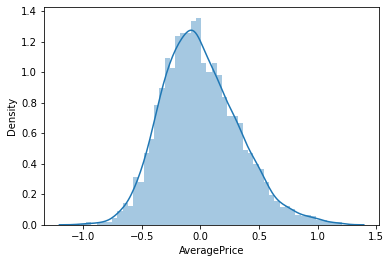

In [482]:
sns.distplot((y_test-pred_rfr),bins=50)


Text(0, 0.5, 'Y Pred')

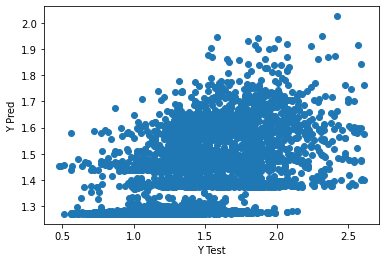

In [479]:
plt.scatter(x=y_test,y=pred_rfr)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')

# Classification Models (Predicting Region):

Here, we'll use gridsearchcv to look for best parameters for hyperparameter tuning. Best_score is the mean of the cross_val_score which is possible with these quantities on a limited dataset. We'll still have to perform cross validation separately to check how cross val impacts our accuracy_score.

In [ ]:
xc=df1_new.drop(columns="region")
yc= df1_new["region"]

We'll have to use scaling again as we did for regression models

In [ ]:
sc = StandardScaler()
xc=sc.fit_transform(xc)

In [368]:
xc = pd.DataFrame(xc,columns=df1_new.drop(columns="region").columns)

In [369]:
xc

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month,Day
0,-0.195352,-0.061962,-0.587318,0.431565,-0.246207,-0.473426,-0.215789,-0.648254,-0.627319,-1.019047,-1.210013,1.644612,1.289309
1,-0.143510,-0.134302,-0.719464,0.359601,-0.199437,-0.431908,-0.179590,-0.636520,-0.627319,-1.019047,-1.210013,1.644612,0.491652
2,-1.232207,0.218235,-0.668997,0.683316,-0.001478,-0.504018,-0.243116,-0.621646,-0.627319,-1.019047,-1.210013,1.644612,-0.306004
3,-0.843387,0.033021,-0.560308,0.532565,-0.145897,-0.661685,-0.384129,-0.552915,-0.627319,-1.019047,-1.210013,1.644612,-1.103660
4,-0.324959,-0.167601,-0.616931,0.353051,-0.135308,-0.632653,-0.362677,-0.449388,-0.627319,-1.019047,-1.210013,1.362113,1.517211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.670586,-0.378245,-0.861693,-1.215018,-0.268139,-0.046548,-0.241763,-0.627319,0.981309,1.980756,-1.180379,-1.331562
17647,0.789660,-0.765474,-0.544515,-0.569192,-1.215018,-0.443885,-0.200255,-0.317520,-0.627319,0.981309,1.980756,-1.462878,1.403260
17648,1.204402,-0.769503,-0.544458,-0.690718,0.424488,-0.437415,-0.182019,-0.855591,-0.627319,0.981309,1.980756,-1.462878,0.605603
17649,1.359930,-0.694596,-0.468195,-0.620126,0.424171,-0.365019,-0.119253,-0.812010,-0.627319,0.981309,1.980756,-1.462878,-0.192053


# Model 1: Decision Tree : 

In [370]:
X_train, X_test, y_train, y_test = train_test_split(xc, yc, test_size=0.25, random_state=653)

In [371]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": [6,8,10], 
                  "min_samples_leaf": [10,15,20]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
print("Best Parameters for Decision Tree: ", grid_tree.best_params_)
print("Best Score for Decision Tree: ", grid_tree.best_score_)

Best Parameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}
Best Score for Decision Tree:  0.6863568116216615


<BarContainer object of 13 artists>

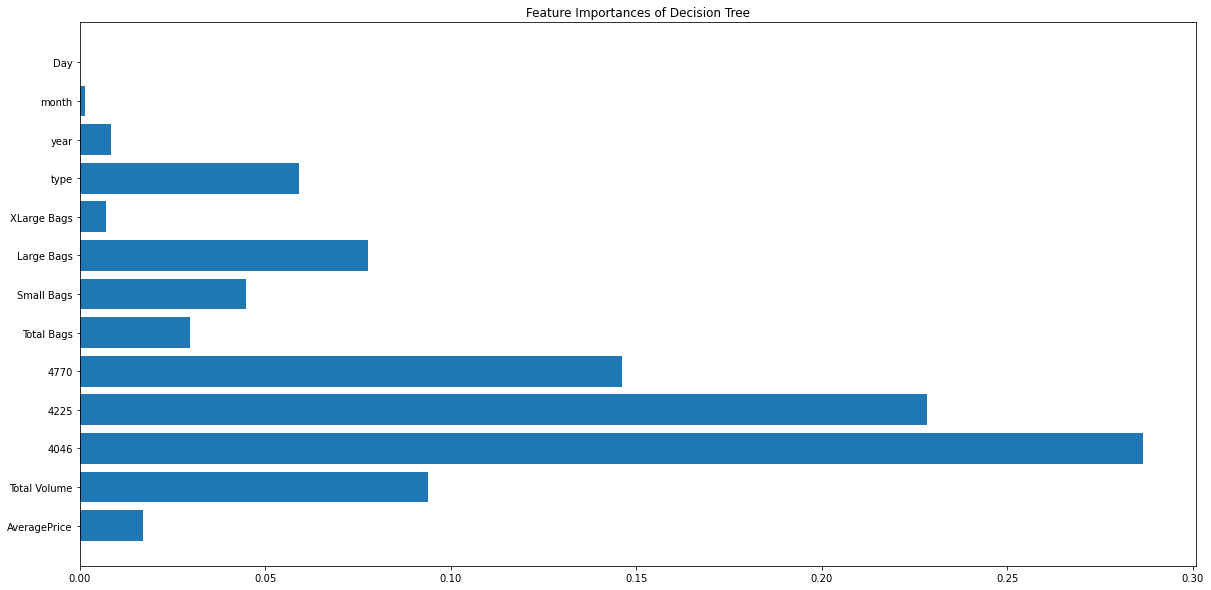

In [372]:
#FEATURE IMPORTANCE FOR DECISION TREE
importance = tree_clf.feature_importances_
plt.figure(figsize=(20,10))
plt.title("Feature Importances of Decision Tree")
plt.barh(xc.columns,importance, align="center")

In [374]:
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10).fit(X_train, y_train)
pred_train2 = dec_tree.predict(X_train)
pred_test2 = dec_tree.predict(X_test) 

In [375]:
print(classification_report(y_test,pred_test2))

              precision    recall  f1-score   support

           0       0.67      0.62      0.65        72
           1       0.56      0.56      0.56        79
           2       0.81      0.93      0.87        84
           3       0.77      0.73      0.75        88
           4       0.73      0.76      0.74        87
           5       0.67      0.70      0.69        91
           6       0.91      0.91      0.91        68
           7       0.54      0.87      0.67        75
           8       0.94      0.87      0.90        84
           9       0.82      0.73      0.77        86
          10       0.55      0.59      0.57        88
          11       0.81      0.83      0.82        90
          12       0.90      0.77      0.83        97
          13       0.57      0.57      0.57        87
          14       0.71      0.78      0.74        74
          15       0.93      0.89      0.91        72
          16       0.73      0.87      0.79        67
          17       0.90    

In [377]:
pred_dt = dec_tree.predict(X_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_dt)
for k in range(2,10):
    lsscore=cross_val_score(dec_tree,xc,yc,cv=k)
    lsc=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lsc*100)
    print("accuracy score is : ",lss*100)
    print("\n")

At cv=  2
Cross Val score :  6.118555850631889
accuracy score is :  70.49626104690687


At cv=  3
Cross Val score :  42.042530261621366
accuracy score is :  70.49626104690687


At cv=  4
Cross Val score :  45.69109384639753
accuracy score is :  70.49626104690687


At cv=  5
Cross Val score :  49.895363045081076
accuracy score is :  70.49626104690687


At cv=  6
Cross Val score :  48.495390462154226
accuracy score is :  70.49626104690687


At cv=  7
Cross Val score :  53.65623674468553
accuracy score is :  70.49626104690687


At cv=  8
Cross Val score :  55.202962653651674
accuracy score is :  70.49626104690687


At cv=  9
Cross Val score :  55.129738820812626
accuracy score is :  70.49626104690687




In [379]:
lsscore_selected = cross_val_score(dec_tree,xc,yc,cv = 8).mean()
print("The cv score is: ", lsscore_selected, "\nThe accuracy score is: ",lss)

The cv score is:  0.551803126005157 
The accuracy score is:  0.7049626104690686


# AUC ROC Curve:

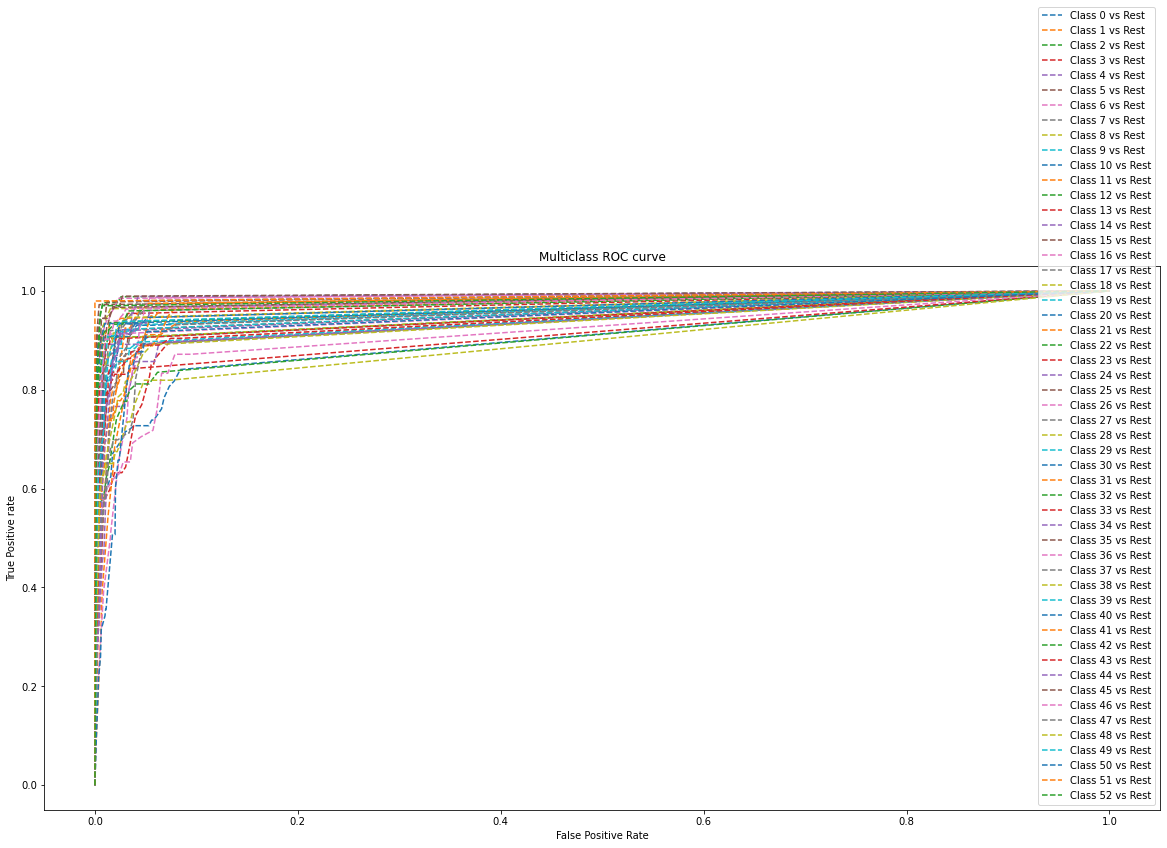

In [386]:
plt.figure(figsize=(20,10))
fpr = {}
tpr = {}
thresh ={}

n_class = 53

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, dec_tree.predict_proba(X_test)[:,i], pos_label=i)
    
# plotting    
for i in range(n_class):
    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i} vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")


In [382]:

roc_auc_score(y_test, dec_tree.predict_proba(X_test), multi_class='ovo', average='weighted')

0.9586139162703987

# Model 2: Random Forest

In [387]:
X_train, X_test, y_train, y_test = train_test_split(xc, yc, test_size=0.25, random_state=42)

In [389]:
forest_params = {"bootstrap":[True, False], "max_depth": [6,7,8],
                  "min_samples_leaf": [5,8,10]}
grid_forest = GridSearchCV(RandomForestClassifier(), forest_params)
grid_forest.fit(X_train, y_train)
# forest best estimator
forest_clf = grid_forest.best_estimator_
print("Best Parameters for Random Forest: ", grid_forest.best_params_)
print("Best Score for Random Forest: ", grid_forest.best_score_)
print("\n")


Best Parameters for Random Forest:  {'bootstrap': True, 'max_depth': 8, 'min_samples_leaf': 5}
Best Score for Random Forest:  0.719595974237494




<BarContainer object of 13 artists>

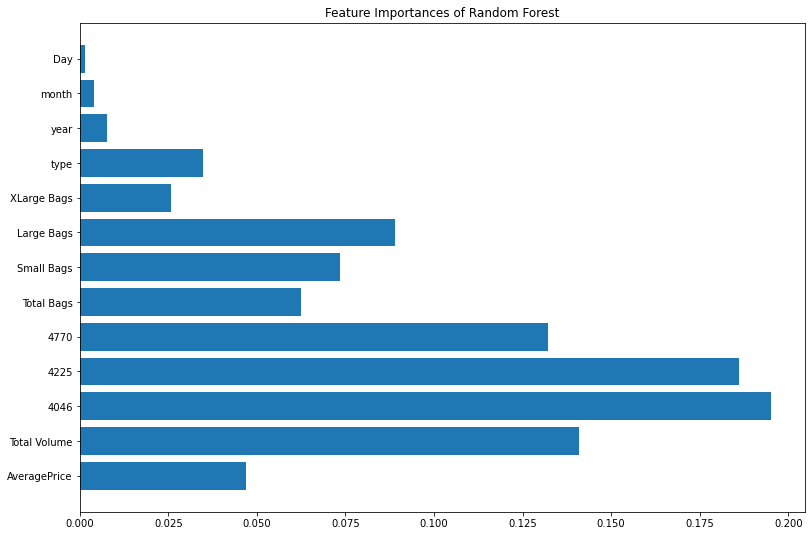

In [390]:
#FEATURE IMPORTANCE FOR DECISION TREE
importance2 = grid_forest.best_estimator_.feature_importances_
plt.figure(figsize=(13,9))
plt.title("Feature Importances of Random Forest")
plt.barh(xc.columns, importance2, align="center")

In [399]:
rfc = RandomForestClassifier(bootstrap=True, max_depth=8, min_samples_leaf=5,n_jobs=-1,n_estimators=230).fit(X_train, y_train)
pred_train3 = rfc.predict(X_train)
pred_test3 = rfc.predict(X_test) 

In [400]:
print(classification_report(y_test,pred_test3))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        86
           1       0.45      0.66      0.53        87
           2       0.82      0.88      0.85        80
           3       0.79      0.72      0.75        81
           4       0.74      0.82      0.78        80
           5       0.81      0.56      0.66        91
           6       0.87      0.92      0.90        75
           7       0.84      0.65      0.73        96
           8       0.77      0.97      0.86        72
           9       0.79      0.65      0.71        93
          10       0.73      0.43      0.54        77
          11       0.81      0.88      0.85        84
          12       0.75      0.58      0.65        86
          13       0.70      0.53      0.60        73
          14       0.75      0.74      0.75        93
          15       0.92      0.90      0.91        72
          16       0.89      0.89      0.89        90
          17       0.64    

In [402]:
pred_rfc = rfc.predict(X_test)
from sklearn.model_selection import cross_val_score
rss = accuracy_score(y_test,pred_rfc)
for k in range(2,10):
    rsscore=cross_val_score(rfc,xc,yc,cv=k)
    rsc=rsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rsc*100)
    print("accuracy score is : ",rss*100)
    print("\n")

At cv=  2
Cross Val score :  5.336869113853031
accuracy score is :  71.51597552685249


At cv=  3
Cross Val score :  33.30014595743211
accuracy score is :  71.51597552685249


At cv=  4
Cross Val score :  47.36234650610914
accuracy score is :  71.51597552685249


At cv=  5
Cross Val score :  52.18395225453551
accuracy score is :  71.51597552685249


At cv=  6
Cross Val score :  52.94251328317859
accuracy score is :  71.51597552685249


At cv=  7
Cross Val score :  58.15927448809182
accuracy score is :  71.51597552685249


At cv=  8
Cross Val score :  58.96329510364491
accuracy score is :  71.51597552685249


At cv=  9
Cross Val score :  59.910322878414746
accuracy score is :  71.51597552685249




In [403]:
rsscore_selected = cross_val_score(rfc,xc,yc,cv = 9).mean()
print("The cv score is: ", rsscore_selected, "\nThe accuracy score is: ",rss)

The cv score is:  0.6035237822786147 
The accuracy score is:  0.7151597552685248


In [407]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rfc.predict_proba(X_test), multi_class='ovo', average='weighted')

0.9842654392002833

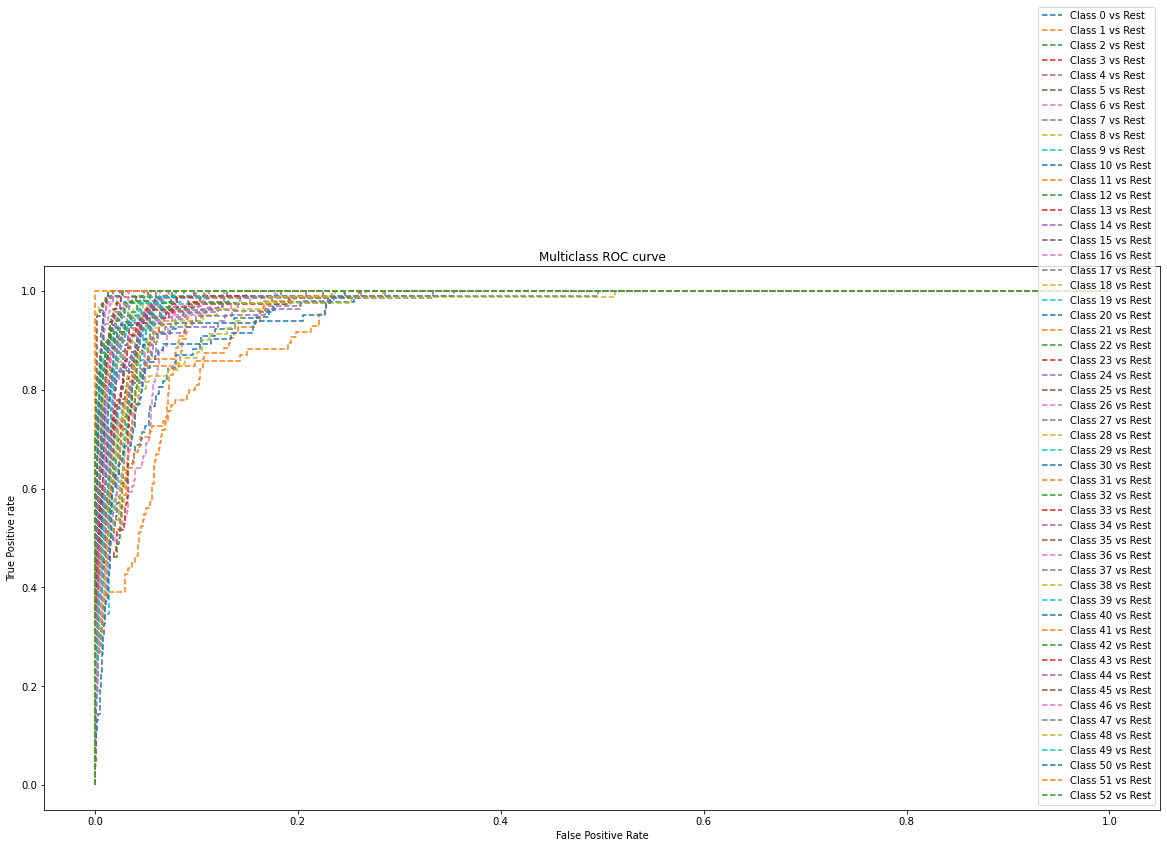

In [410]:
plt.figure(figsize=(20,10))
fpr = {}
tpr = {}
thresh ={}

n_class = 53

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, rfc.predict_proba(X_test)[:,i], pos_label=i)
    
# plotting    
for i in range(n_class):
    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i} vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")


# Model 3 : SVC

In [427]:
X_train, X_test, y_train, y_test = train_test_split(xc, yc, test_size=0.25, random_state=63)

In [429]:
svc_params = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
rand_svc = RandomizedSearchCV(SVC(), svc_params)
rand_svc.fit(X_train, y_train)
# SVC best estimator
svc = rand_svc.best_estimator_
print("Best Parameters for SVM: ", rand_svc.best_params_)
print("Best Score for SVM: ", rand_svc.best_score_)
print("------------------------------------------")

Best Parameters for SVM:  {'kernel': 'rbf', 'C': 10.0}
Best Score for SVM:  0.8767183564132912
------------------------------------------


In [436]:
svm = SVC(C=10.0, kernel='rbf',probability=True).fit(X_train, y_train)
pred_train4 = svm.predict(X_train)
pred_test4 = svm.predict(X_test) 

In [434]:
pred_svm = svm.predict(X_test)

svms = accuracy_score(y_test,pred_svm)
for k in range(3,10):
    svmsscore=cross_val_score(svm,xc,yc,cv=k)
    svmsc=svmsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",svmsc*100)
    print("accuracy score is : ",svms*100)
    print("\n")

At cv=  3
Cross Val score :  45.46434284932033
accuracy score is :  89.00974393836393


At cv=  4
Cross Val score :  55.25967922393637
accuracy score is :  89.00974393836393


At cv=  5
Cross Val score :  62.625355511643946
accuracy score is :  89.00974393836393


At cv=  6
Cross Val score :  64.3358279720214
accuracy score is :  89.00974393836393


At cv=  7
Cross Val score :  71.18467027192496
accuracy score is :  89.00974393836393


At cv=  8
Cross Val score :  71.88710938286282
accuracy score is :  89.00974393836393


At cv=  9
Cross Val score :  71.96109328415601
accuracy score is :  89.00974393836393




At cv = 9 , Cross Val score :  71.96
accuracy score :  89.00

In [437]:
roc_auc_score(y_test, svm.predict_proba(X_test), multi_class='ovo', average='weighted')

0.9983123234633543

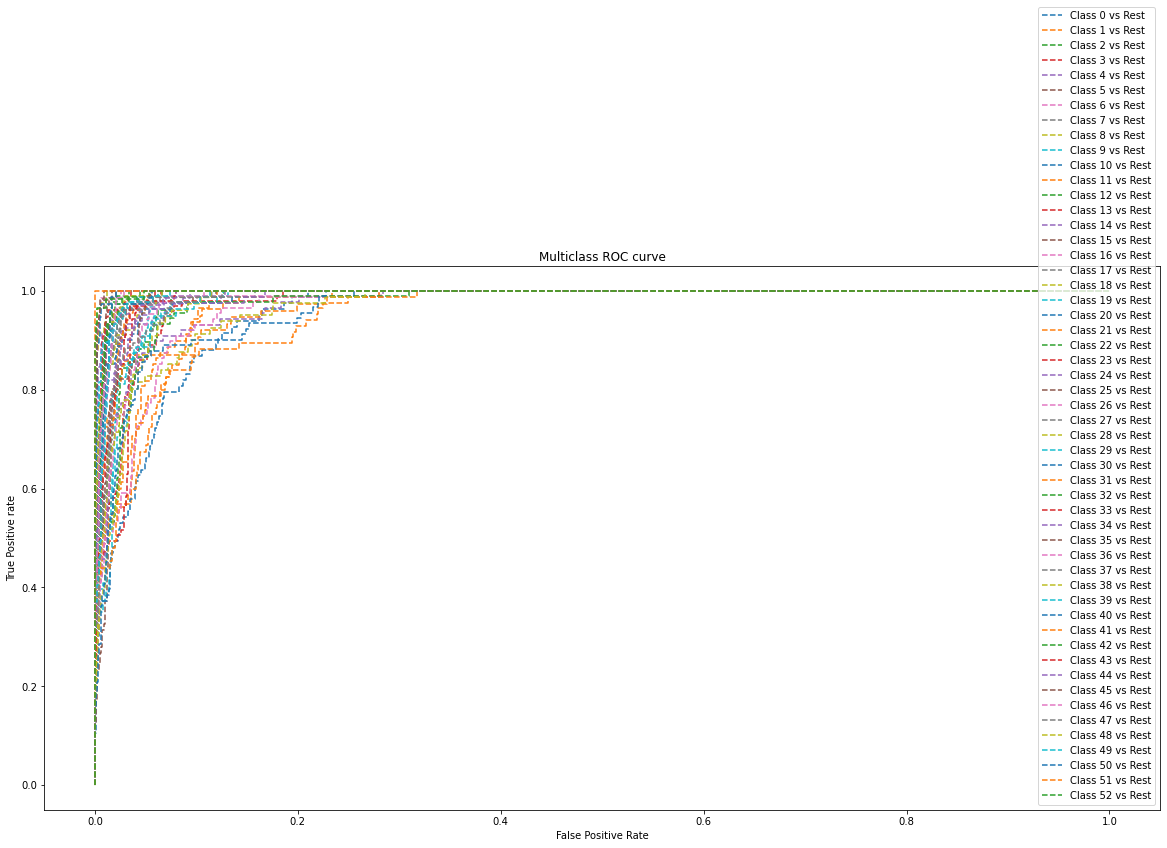

In [433]:
plt.figure(figsize=(20,10))
fpr = {}
tpr = {}
thresh ={}

n_class = 53

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, rfc.predict_proba(X_test)[:,i], pos_label=i)
    
# plotting    
for i in range(n_class):
    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i} vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")


# Conclusion: 

For regression, We can see that Decision tree proves to be the best among all three as the RMSE is the lowest and the distplot shows that the prediction form a perfect normal distribution and for classification purposes, SVC is the best as the accuracy score is 89+ %

Saving the model :

In [496]:
import pickle

In [497]:
filename = "Avocado_pred_region_price.pkl"
pickle.dump(rfc,open(filename,'wb'))